## Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from evaluation import compare_models

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported")

Libraries imported


## Collect Model Results

**Instructions:** Run all 5 model notebooks first, then copy the metrics here.

For each model, record:
- Train RMSE, Train MAE, Train R²
- Val RMSE, Val MAE, Val R²
- Test RMSE, Test MAE, Test R² (from internal test set)

In [36]:
# TODO: Replace these placeholder values with actual results from running each notebook
results = {
    'Ridge Regression': {
        'Train RMSE': 0.095230,  # Replace with actual value
        'Val RMSE': 0.126991,
        'Test RMSE': 0.124664,
        'Train MAE': 0.068522,
        'Val MAE': 0.085588,
        'Test MAE': 0.082486,
        'Train R²': 0.942041,
        'Val R²': 0.901695,
        'Test R²': 0.908628
    },
    'Polynomial Regression': {
        'Train RMSE': 0.108434,
        'Val RMSE': 0.135737,
        'Test RMSE': 0.135923,
        'Train MAE': 0.078403,
        'Val MAE': 0.096373,
        'Test MAE': 0.093227,
        'Train R²': 0.924854,
        'Val R²': 0.887689,
        'Test R²': 0.891377
    },
    'Neural Network': {
        'Train RMSE': 0.467784,
        'Val RMSE': 0.915119,
        'Test RMSE': 1.069165,
        'Train MAE': 0.081365,
        'Val MAE': 0.604542,
        'Test MAE': 0.603268,
        'Train R²': -0.398513,
        'Val R²': -4.104858,
        'Test R²': -5.720813
    },
    'Random Forest': {
        'Train RMSE': 0.057155,
        'Val RMSE': 0.149971,
        'Test RMSE': 0.156840,
        'Train MAE': 0.039182,
        'Val MAE': 0.102882,
        'Test MAE': 0.098801,
        'Train R²': 0.979122,
        'Val R²': 0.862899,
        'Test R²': 0.855374
    },
    'XGBoost': {
        'Train RMSE': 0.031017,
        'Val RMSE': 0.128409,
        'Test RMSE': 0.127256,
        'Train MAE': 0.023014,
        'Val MAE': 0.087211,
        'Test MAE': 0.081889,
        'Train R²': 0.993852,
        'Val R²': 0.899487,
        'Test R²': 0.904788
    }
}

print("Results dictionary created (update with actual values)")

Results dictionary created (update with actual values)


## Generate Comparison Table

In [37]:
# Generate comparison DataFrame (sorted by validation R²)
# Normalize result keys to match compare_models expected format (e.g., 'train_rmse', 'val_rmse', etc.)
normalized_results = {
	model: {
		'train_rmse': metrics['Train RMSE'],
		'val_rmse': metrics['Val RMSE'],
		'test_rmse': metrics['Test RMSE'],
		'train_mae': metrics['Train MAE'],
		'val_mae': metrics['Val MAE'],
		'test_mae': metrics['Test MAE'],
		'train_r2': metrics['Train R²'],
		'val_r2': metrics['Val R²'],
		'test_r2': metrics['Test R²'],
		'overfitting': metrics['Train R²'] - metrics['Test R²'],
	}
	for model, metrics in results.items()
}

comparison_df = compare_models(normalized_results)

print("\n" + "="*100)
print("MODEL PERFORMANCE COMPARISON")
print("="*100)
print(comparison_df.to_string())
print("="*100)


MODEL PERFORMANCE COMPARISON
                   Model  Train RMSE  Val RMSE  Train MAE   Val MAE  Train R²    Val R²  Overfitting
0       Ridge Regression    0.095230  0.126991   0.068522  0.085588  0.942041  0.901695     0.033413
4                XGBoost    0.031017  0.128409   0.023014  0.087211  0.993852  0.899487     0.089064
1  Polynomial Regression    0.108434  0.135737   0.078403  0.096373  0.924854  0.887689     0.033477
3          Random Forest    0.057155  0.149971   0.039182  0.102882  0.979122  0.862899     0.123748
2         Neural Network    0.467784  0.915119   0.081365  0.604542 -0.398513 -4.104858     5.322300


## Visualization: RMSE Comparison

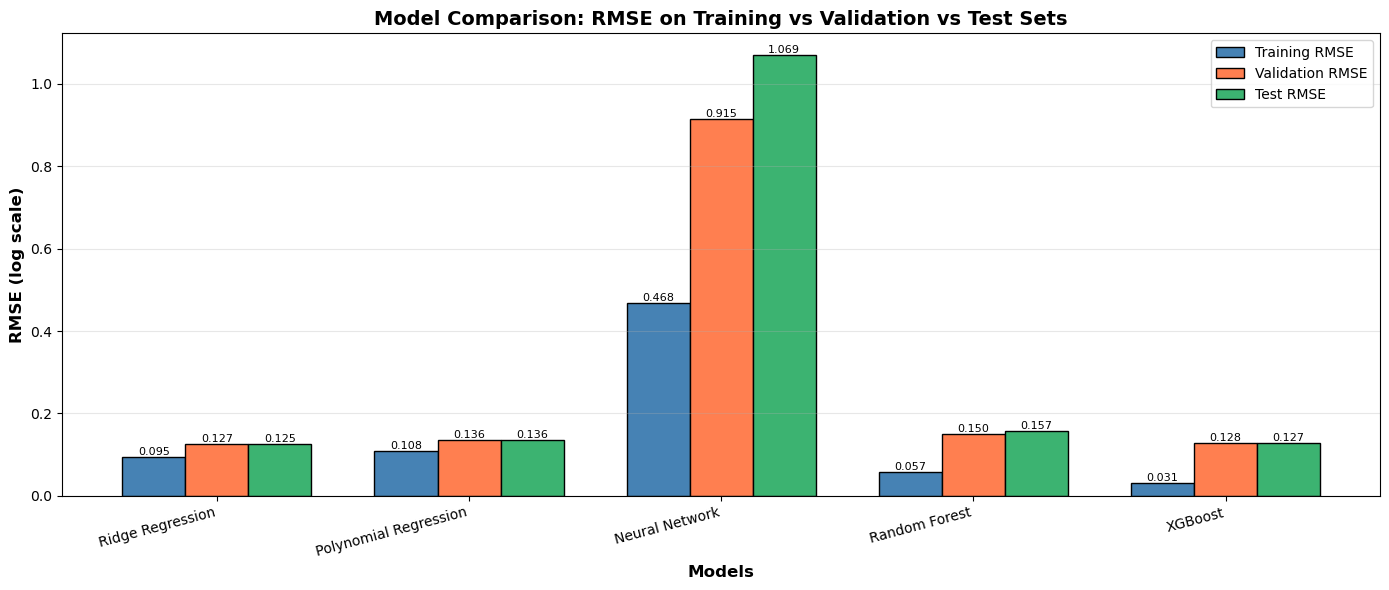

In [38]:
# Extract RMSE values
models = list(results.keys())
train_rmse = [results[model]['Train RMSE'] for model in models]
val_rmse = [results[model]['Val RMSE'] for model in models]
test_rmse = [results[model]['Test RMSE'] for model in models]

# Create grouped bar chart
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width, train_rmse, width, label='Training RMSE', color='steelblue', edgecolor='black')
bars2 = ax.bar(x, val_rmse, width, label='Validation RMSE', color='coral', edgecolor='black')
bars3 = ax.bar(x + width, test_rmse, width, label='Test RMSE', color='mediumseagreen', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('RMSE (log scale)', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: RMSE on Training vs Validation vs Test Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Visualization: MAE Comparison

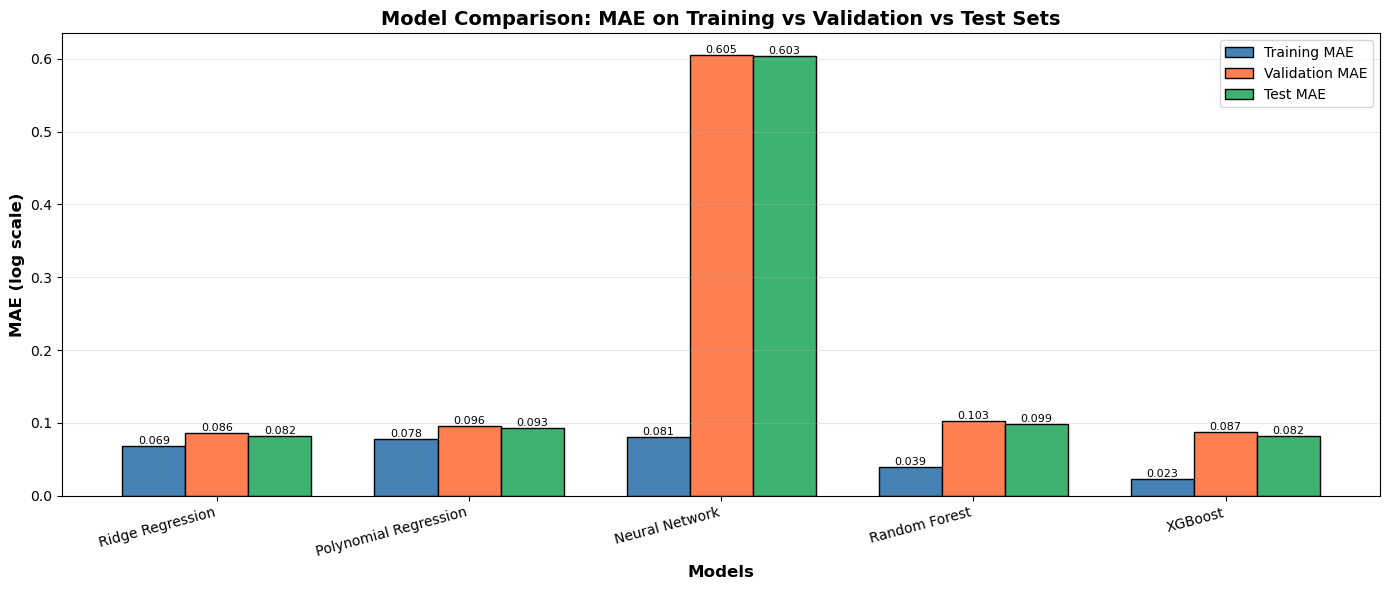

In [39]:
# Extract MAE values
train_mae = [results[model]['Train MAE'] for model in models]
val_mae = [results[model]['Val MAE'] for model in models]
test_mae = [results[model]['Test MAE'] for model in models]

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width, train_mae, width, label='Training MAE', color='steelblue', edgecolor='black')
bars2 = ax.bar(x, val_mae, width, label='Validation MAE', color='coral', edgecolor='black')
bars3 = ax.bar(x + width, test_mae, width, label='Test MAE', color='mediumseagreen', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('MAE (log scale)', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: MAE on Training vs Validation vs Test Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Visualization: R² Comparison

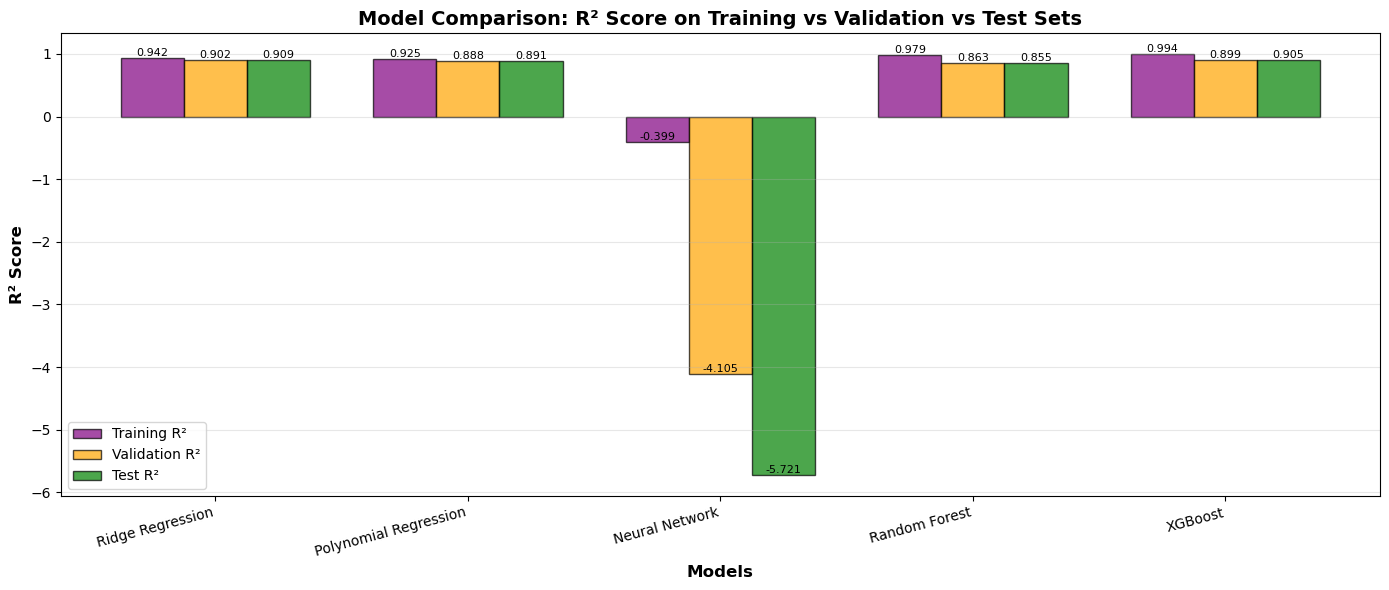

In [40]:
# Extract R² values
train_r2 = [results[model]['Train R²'] for model in models]
val_r2 = [results[model]['Val R²'] for model in models]
test_r2 = [results[model]['Test R²'] for model in models]

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width, train_r2, width, label='Training R²', color='purple', edgecolor='black', alpha=0.7)
bars2 = ax.bar(x, val_r2, width, label='Validation R²', color='orange', edgecolor='black', alpha=0.7)
bars3 = ax.bar(x + width, test_r2, width, label='Test R²', color='green', edgecolor='black', alpha=0.7)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: R² Score on Training vs Validation vs Test Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Visualization: Overfitting Analysis

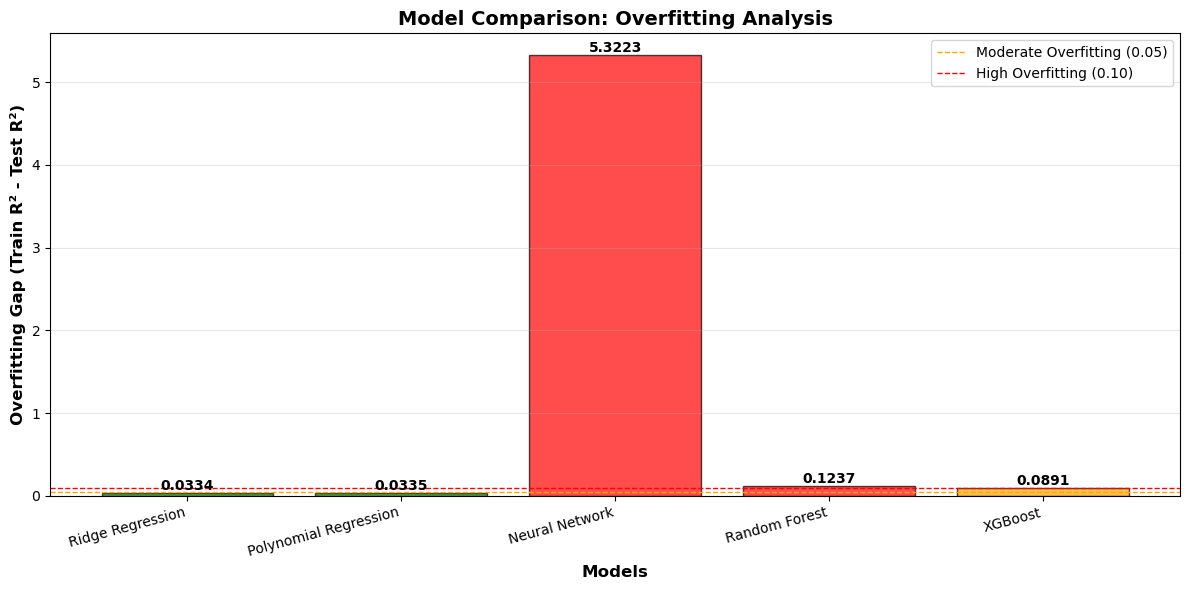


Overfitting Interpretation:
  Green: Low overfitting (< 0.05)
  Orange: Moderate overfitting (0.05 - 0.10)
  Red: High overfitting (> 0.10)


In [41]:
# Calculate overfitting metric (difference between train and test R²)
overfitting = [train_r2[i] - test_r2[i] for i in range(len(models))]

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' for x in overfitting]
bars = ax.bar(models, overfitting, color=colors, edgecolor='black', alpha=0.7)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Overfitting Gap (Train R² - Test R²)', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: Overfitting Analysis', fontsize=14, fontweight='bold')
ax.set_xticklabels(models, rotation=15, ha='right')
ax.axhline(y=0.05, color='orange', linestyle='--', linewidth=1, label='Moderate Overfitting (0.05)')
ax.axhline(y=0.10, color='red', linestyle='--', linewidth=1, label='High Overfitting (0.10)')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nOverfitting Interpretation:")
print("  Green: Low overfitting (< 0.05)")
print("  Orange: Moderate overfitting (0.05 - 0.10)")
print("  Red: High overfitting (> 0.10)")

## Visualization: Comprehensive Heatmap

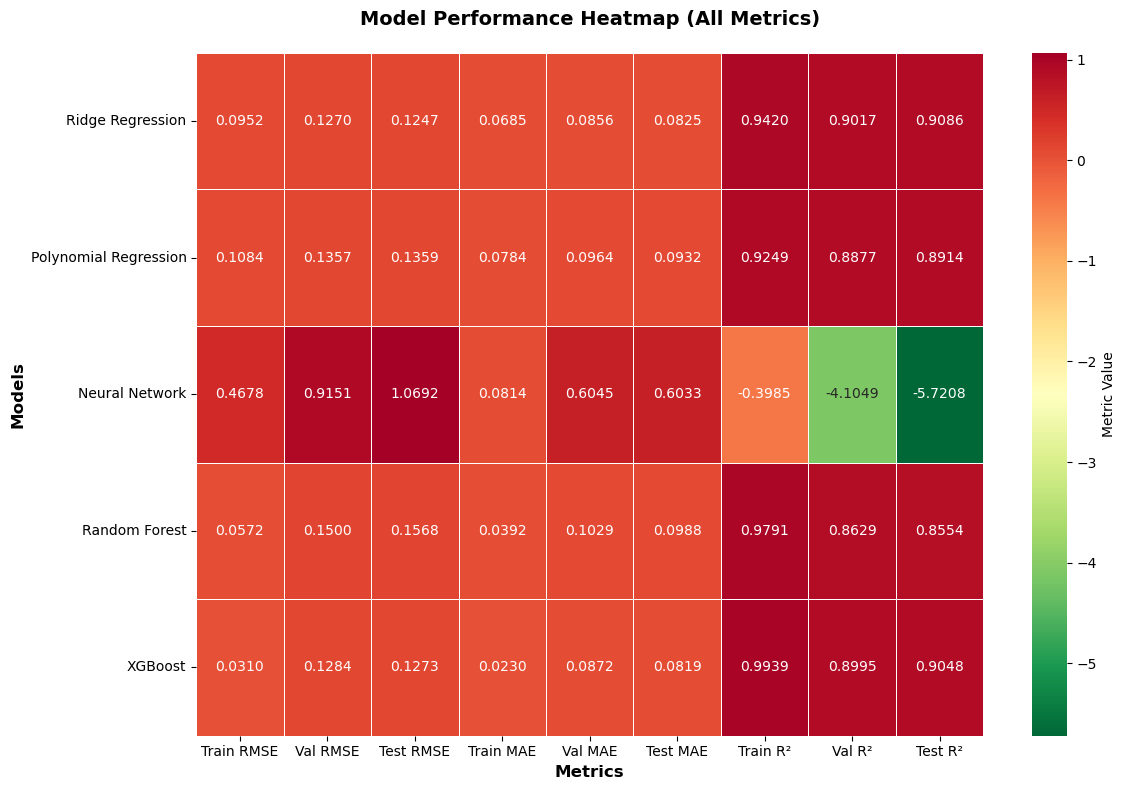

In [42]:
# Create a heatmap showing all metrics
metrics_matrix = []
metric_names = ['Train RMSE', 'Val RMSE', 'Test RMSE', 'Train MAE', 'Val MAE', 'Test MAE', 'Train R²', 'Val R²', 'Test R²']

for model in models:
    metrics_matrix.append([
        results[model]['Train RMSE'],
        results[model]['Val RMSE'],
        results[model]['Test RMSE'],
        results[model]['Train MAE'],
        results[model]['Val MAE'],
        results[model]['Test MAE'],
        results[model]['Train R²'],
        results[model]['Val R²'],
        results[model]['Test R²']
    ])

metrics_df = pd.DataFrame(metrics_matrix, index=models, columns=metric_names)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='RdYlGn_r', linewidths=0.5, 
            cbar_kws={'label': 'Metric Value'}, ax=ax)
ax.set_title('Model Performance Heatmap (All Metrics)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Models', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Summary Statistics

In [43]:
print("\n" + "="*80)
print("PERFORMANCE SUMMARY")
print("="*80)

# Best model by test R²
best_model_r2 = max(results.items(), key=lambda x: x[1]['Test R²'])
print(f"\nBest Model (Test R²): {best_model_r2[0]}")
print(f"  Test R²: {best_model_r2[1]['Test R²']:.6f}")
print(f"  Test RMSE: {best_model_r2[1]['Test RMSE']:.6f}")
print(f"  Test MAE: {best_model_r2[1]['Test MAE']:.6f}")

# Best model by test RMSE (lower is better)
best_model_rmse = min(results.items(), key=lambda x: x[1]['Test RMSE'])
print(f"\nBest Model (Test RMSE): {best_model_rmse[0]}")
print(f"  Test RMSE: {best_model_rmse[1]['Test RMSE']:.6f}")
print(f"  Test R²: {best_model_rmse[1]['Test R²']:.6f}")
print(f"  Test MAE: {best_model_rmse[1]['Test MAE']:.6f}")

# Model with least overfitting
overfitting_scores = {model: results[model]['Train R²'] - results[model]['Test R²'] 
                      for model in models}
best_generalization = min(overfitting_scores.items(), key=lambda x: x[1])
print(f"\nBest Generalization (Least Overfitting): {best_generalization[0]}")
print(f"  Overfitting Gap: {best_generalization[1]:.6f}")
print(f"  Train R²: {results[best_generalization[0]]['Train R²']:.6f}")
print(f"  Test R²: {results[best_generalization[0]]['Test R²']:.6f}")

print("\n" + "="*80)


PERFORMANCE SUMMARY

Best Model (Test R²): Ridge Regression
  Test R²: 0.908628
  Test RMSE: 0.124664
  Test MAE: 0.082486

Best Model (Test RMSE): Ridge Regression
  Test RMSE: 0.124664
  Test R²: 0.908628
  Test MAE: 0.082486

Best Generalization (Least Overfitting): Ridge Regression
  Overfitting Gap: 0.033413
  Train R²: 0.942041
  Test R²: 0.908628



## Export Results for Technical Report

This generates a formatted table that can be copied directly into the technical report.

In [44]:
print("\n" + "="*120)
print("TABLE FOR TECHNICAL REPORT (Copy this into Section 3.1)")
print("="*120)
print("\nTable 1: Model Performance Comparison\n")
print("| Model | Train RMSE | Val RMSE | Test RMSE | Train MAE | Val MAE | Test MAE | Train R² | Val R² | Test R² | Overfitting |")
print("|-------|------------|----------|-----------|-----------|---------|----------|----------|--------|---------|-------------|")

for model in models:
    r = results[model]
    overfit = r['Train R²'] - r['Test R²']
    print(f"| {model:20s} | {r['Train RMSE']:.6f} | {r['Val RMSE']:.6f} | {r['Test RMSE']:.6f} | "
          f"{r['Train MAE']:.6f} | {r['Val MAE']:.6f} | {r['Test MAE']:.6f} | {r['Train R²']:.6f} | "
          f"{r['Val R²']:.6f} | {r['Test R²']:.6f} | {overfit:.6f} |")

print("\n" + "="*120)


TABLE FOR TECHNICAL REPORT (Copy this into Section 3.1)

Table 1: Model Performance Comparison

| Model | Train RMSE | Val RMSE | Test RMSE | Train MAE | Val MAE | Test MAE | Train R² | Val R² | Test R² | Overfitting |
|-------|------------|----------|-----------|-----------|---------|----------|----------|--------|---------|-------------|
| Ridge Regression     | 0.095230 | 0.126991 | 0.124664 | 0.068522 | 0.085588 | 0.082486 | 0.942041 | 0.901695 | 0.908628 | 0.033413 |
| Polynomial Regression | 0.108434 | 0.135737 | 0.135923 | 0.078403 | 0.096373 | 0.093227 | 0.924854 | 0.887689 | 0.891377 | 0.033477 |
| Neural Network       | 0.467784 | 0.915119 | 1.069165 | 0.081365 | 0.604542 | 0.603268 | -0.398513 | -4.104858 | -5.720813 | 5.322300 |
| Random Forest        | 0.057155 | 0.149971 | 0.156840 | 0.039182 | 0.102882 | 0.098801 | 0.979122 | 0.862899 | 0.855374 | 0.123748 |
| XGBoost              | 0.031017 | 0.128409 | 0.127256 | 0.023014 | 0.087211 | 0.081889 | 0.993852 | 0.899487 | 